# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
d=pd.read_csv('data/BA_reviews.csv')

In [6]:
d.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
d.head()

,reviews
0,✅ Trip Verified | I flew to LHR from ATH in C...
1,✅ Trip Verified | I like the British Airways ...
2,✅ Trip Verified | I have come to boarding and...
3,✅ Trip Verified | Stinking nappies being chang...
4,✅ Trip Verified | Worst service ever. Lost bag...


In [8]:
d.reviews = d.reviews.str.split('|', expand=True)[1]

In [9]:
d.head()

,reviews
0,I flew to LHR from ATH in Club Europe with B...
1,I like the British Airways World Traveller P...
2,I have come to boarding and my cabin luggage...
3,Stinking nappies being changed in business ca...
4,Worst service ever. Lost baggage because of d...


In [10]:
def clean(text):
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text
d['clean_reviews'] = d['reviews'].apply(clean)
d.head()

,reviews,clean_reviews
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...


In [11]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [12]:
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))

    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list

In [13]:
d['POS Tagged'] = d['clean_reviews'].apply(token_stop_pos)
d.head()

,reviews,clean_reviews,POS Tagged
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu..."
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[(like, v), (British, None), (Airways, n), (Wo..."
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[(come, v), (boarding, n), (cabin, n), (luggag..."
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b..."
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v..."


In [14]:
lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rev = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rev = lemma_rev + " " + lemma
     else:
        lemma = lemmatizer.lemmatize(word, pos=pos)
        lemma_rev = lemma_rev + " " + lemma
    return lemma_rev

In [15]:
d['lemma'] = d['POS Tagged'].apply(lemmatize)
d.head()

,reviews,clean_reviews,POS Tagged,lemma
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu...",fly LHR ATH Club Europe BA Dec transfer JAL ...
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[(like, v), (British, None), (Airways, n), (Wo...",like British Airways World Traveller Plus pr...
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[(come, v), (boarding, n), (cabin, n), (luggag...",come boarding cabin luggage take plane full ...
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...


In [17]:
pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --------- --------------------------- 30.7/126.0 kB 163.8 kB/s eta 0:00:01
     --------- --------------------------- 30.7/126.0 kB 163.8 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/126.0 kB 140.3 kB/s eta 0:00:01
     ------------------------ ------------ 81.9/126.0 kB 255.1 kB/s eta 0:00:01
     -------------------------------- --- 112.6/126.0 kB 312.2 kB/s eta 0:00:01
     -----------------------------------  122.9/126.0 kB 327.4 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 274.2 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [18]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
Analyzer = SentimentIntensityAnalyzer()

In [20]:
def sentiment_scores(review):
    ss = Analyzer.polarity_scores(review)
    return ss['compound']

d['Sentiment'] = d['lemma'].apply(sentiment_scores)

# Function to analyse the sentiment
def sentiment_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [21]:
d['Review'] = d['Sentiment'].apply(sentiment_analysis)
d.head(10)

,reviews,clean_reviews,POS Tagged,lemma,Sentiment,Review
0,I flew to LHR from ATH in Club Europe with B...,I flew to LHR from ATH in Club Europe with BA...,"[(flew, v), (LHR, n), (ATH, n), (Club, n), (Eu...",fly LHR ATH Club Europe BA Dec transfer JAL ...,0.9565,Positive
1,I like the British Airways World Traveller P...,I like the British Airways World Traveller Pl...,"[(like, v), (British, None), (Airways, n), (Wo...",like British Airways World Traveller Plus pr...,0.9590,Positive
2,I have come to boarding and my cabin luggage...,I have come to boarding and my cabin luggage ...,"[(come, v), (boarding, n), (cabin, n), (luggag...",come boarding cabin luggage take plane full ...,0.4767,Neutral
3,Stinking nappies being changed in business ca...,Stinking nappies being changed in business ca...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...,0.8115,Positive
4,Worst service ever. Lost baggage because of d...,Worst service ever Lost baggage because of de...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...,-0.9001,Negative
5,BA 246 21JAN 2023 Did not appreciate the unp...,BA JAN Did not appreciate the unprofessional ...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...,0.2960,Neutral
6,Not a great experience. I could not check in ...,Not a great experience I could not check in o...,"[(great, None), (experience, n), (could, None)...",great experience could check online two sepa...,0.9538,Positive
7,I was excited to fly BA as I'd not travelled ...,I was excited to fly BA as I d not travelled ...,"[(excited, v), (fly, v), (BA, n), (travelled, ...",excite fly BA travel long haul yr travel Aus...,0.7506,Positive
8,I just want to warn everyone of the worst cu...,I just want to warn everyone of the worst cus...,"[(want, v), (warn, v), (everyone, n), (worst, ...",want warn everyone worst customer service ex...,0.5509,Positive
9,Paid for business class travelling Cairo to L...,Paid for business class travelling Cairo to L...,"[(Paid, v), (business, n), (class, n), (travel...",Paid business class travel Cairo London Heat...,-0.2182,Negative


In [23]:
review_cnt = d['Review'].value_counts()
review_cnt

Review
Positive    478
Negative    415
Neutral     107
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x209134ba950>,
 [Text(0.07596607924664532, 1.09737375346957, 'Positive'),
  Text(-0.43368911716830294, -1.0108974971033307, 'Negative'),
  Text(1.2744424129677328, -0.4453049921446907, 'Neutral')],
 [Text(0.0414360432254429, 0.5985675018924926, '47.8%'),
  Text(-0.23655770027361975, -0.5513986347836348, '41.5%'),
  Text(0.802426704461165, -0.2803772172762867, '10.7%')])

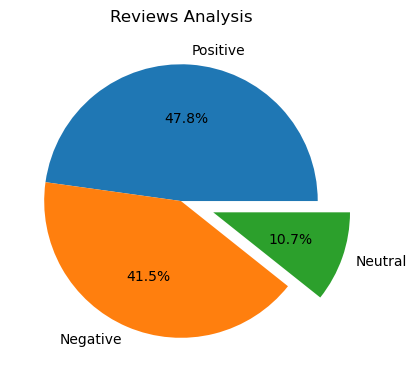

In [25]:
plt.figure(figsize=(15,7))
plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(review_cnt.values, labels = review_cnt.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)

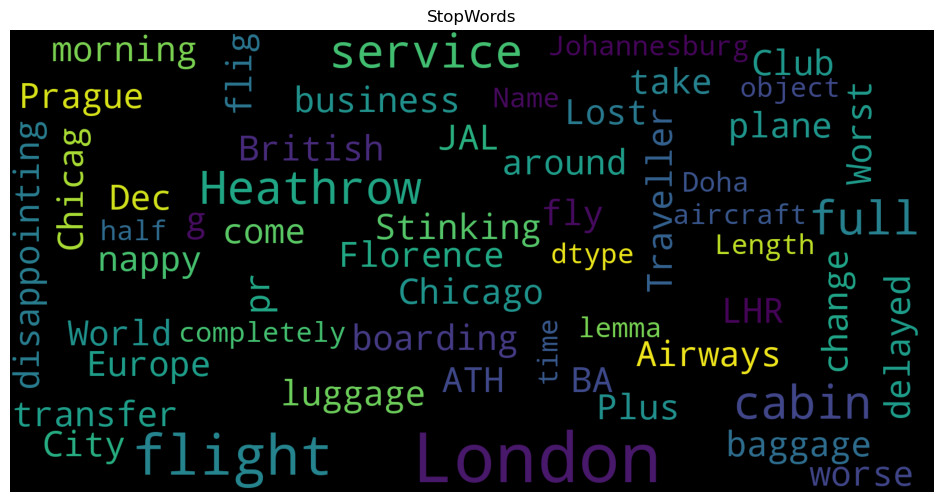

In [33]:
stopwords = set(STOPWORDS)

# Function to generate stopwords
def show_wordcloud(data):
    wordcloud = WordCloud(max_words=150,
                          max_font_size=30,
                          stopwords=stopwords,
                          background_color='Black',
                          scale=4,
                          random_state=1)
    wordcloud = wordcloud.generate(str(data))

    plt.figure(figsize=(12,6))
    plt.axis('off')
    plt.title('StopWords')
    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(d.lemma)

In [34]:
d.shape

(1000, 6)